
## 3 Month window CIVS data


In [1]:

from sktime.forecasting.compose import EnsembleForecaster
from sklearn.svm import SVR
from sktime.transformations.series.detrend import ConditionalDeseasonalizer
from sktime.datasets import load_macroeconomic


In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
## warnings.filterwarnings('ignore')
from statsmodels.tsa.api import seasonal_decompose, adfuller


In [3]:

import sktime
import statsmodels as sm
import matplotlib 
import sklearn

from sklearn.linear_model import( LinearRegression, 
                                 ElasticNet, 
                                 Ridge, 
                                 Lasso, 
                                 HuberRegressor)


from sktime.performance_metrics.forecasting import(MeanAbsolutePercentageError, 
                                                   MeanSquaredError, 
                                                   MeanAbsoluteScaledError)

from statsmodels.graphics.tsaplots import plot_acf


In [4]:

from sklearn.ensemble import (RandomForestRegressor, 
                              GradientBoostingRegressor, 
                              ExtraTreesRegressor)


from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor


In [5]:

from sktime.transformations.series.detrend import Deseasonalizer
from sktime.forecasting.base import ForecastingHorizon
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError as mape
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.model_selection import temporal_train_test_split

from sktime.transformations.series.detrend import Detrender
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.forecasting.compose import TransformedTargetForecaster
from sktime.performance_metrics.forecasting import mean_squared_percentage_error as mspe
from sktime.performance_metrics.forecasting import mean_squared_error as mse
from sktime.performance_metrics.forecasting import mean_absolute_scaled_error as  mase


In [6]:

from sktime.forecasting.compose import make_reduction


In [7]:

from sktime.forecasting.model_selection import ForecastingGridSearchCV
from sktime.split import                  SlidingWindowSplitter
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError


In [8]:

def split_data(df, test_split=0.15):
    n = int(len(df) * test_split)
    train, test = df[:-n], df[-n:]
    return train, test



## All CIVS data


In [9]:

all_ts_data = pd.read_csv(
            'data/RealSeqData.CIVS.Nov.2023.csv',
            header=0,
            parse_dates = ['time'],
            index_col=0,
            infer_datetime_format=True
)


/var/folders/q4/zdsjyw0d297_fn6_fh5n7g9h0000gn/T/ipykernel_8040/2883079414.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  all_ts_data = pd.read_csv(
/var/folders/q4/zdsjyw0d297_fn6_fh5n7g9h0000gn/T/ipykernel_8040/2883079414.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_ts_data = pd.read_csv(


In [10]:

all_ts_data.head(5)


,THEORETICAL_TONNAGE,Coke_Rate,HOT_BLAST_TMP_NORTH_SOUTH,BF_WINDRATE,SNORT_VALVE_POSITION,i_COLD_BLAST_MOISTURE,HOST_BLAST_MOISTURE,HIGH_PURITY_OXYGEN,COAL_FLOW,NAT_GAS_INJECTION,...,BF14_material_8_weight_a,BF14_material_8_weight_b,BF14_material_9_weight_a,BF14_material_9_weight_b,BF14_material_10_weight_a,BF14_material_10_weight_b,NE_Uptake_Temp,SE_Uptake,NE_Uptake,SW_Uptake
time,,,,,,,,,,,,,,,,,,,,,
2021-08-01 00:00:00,6006,992,1999.604384,179.749638,98.334297,4.997585,8.084517,2.510680,0.0,4034.234339,...,0,0,21118.33333,562140,9022.666667,212980,158.478922,245.634175,145.396538,220.717349
2021-08-01 00:01:00,6006,992,2000.288837,179.765945,98.334297,5.000531,8.079545,2.489381,0.0,4024.947376,...,0,0,21115.00000,562140,8988.000000,212980,159.637733,252.459217,145.570895,226.360600
2021-08-01 00:02:00,6006,992,1999.242862,179.782251,98.334297,5.003476,8.074573,2.489037,0.0,4011.601682,...,0,0,21111.66667,562140,8953.333333,212980,160.796544,252.645736,145.745252,230.297540
2021-08-01 00:03:00,6006,992,1999.884442,179.798490,98.334297,5.006422,8.069602,2.496867,0.0,4012.024633,...,0,0,21108.33333,562140,8918.666667,212980,161.955355,247.987563,145.919609,225.220292
2021-08-01 00:04:00,6006,992,1999.849729,179.784430,98.334297,5.009368,8.064630,2.501961,0.0,4000.467204,...,0,0,21105.00000,562140,8884.000000,212980,163.102736,226.923719,146.093966,218.827693


In [11]:

all_ts_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 265020 entries, 2021-08-01 00:00:00 to 2022-01-31 23:59:00
Data columns (total 56 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   THEORETICAL_TONNAGE            265020 non-null  int64  
 1   Coke_Rate                      265020 non-null  int64  
 2   HOT_BLAST_TMP_NORTH_SOUTH      265020 non-null  float64
 3   BF_WINDRATE                    265020 non-null  float64
 4   SNORT_VALVE_POSITION           265020 non-null  float64
 5   i_COLD_BLAST_MOISTURE          265020 non-null  float64
 6   HOST_BLAST_MOISTURE            265020 non-null  float64
 7   HIGH_PURITY_OXYGEN             265020 non-null  float64
 8   COAL_FLOW                      265020 non-null  float64
 9   NAT_GAS_INJECTION              265020 non-null  float64
 10  i_HOT_BLAST_PRESSURE           265020 non-null  float64
 11  TOP_PRESS                      265020 non-null  float64
 

<Axes: xlabel='time'>

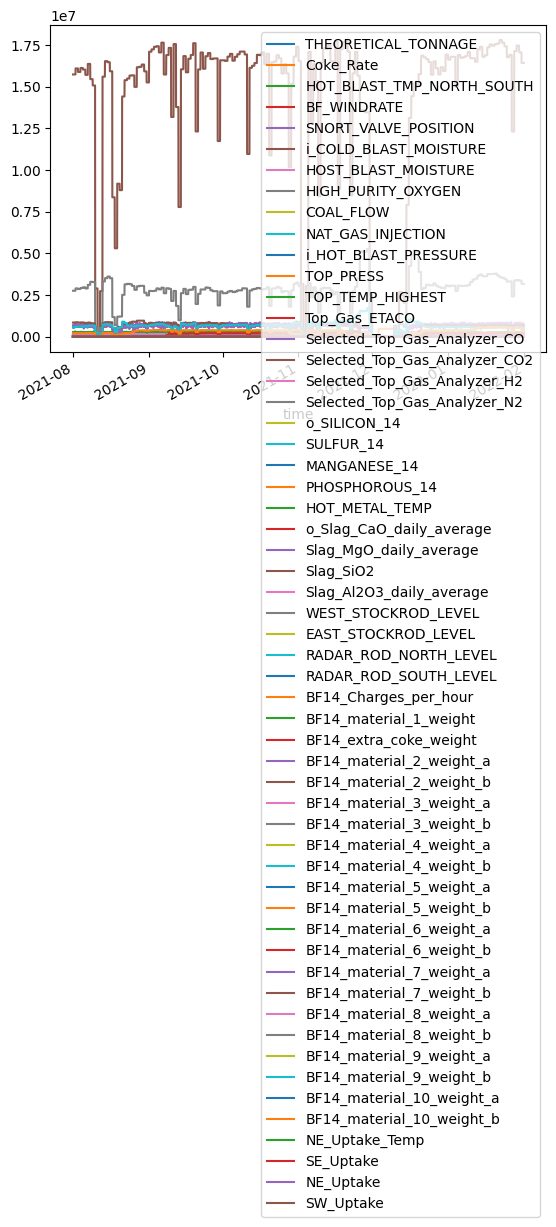

In [12]:

all_ts_data.plot()


array([<Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>, <Axes: xlabel='t

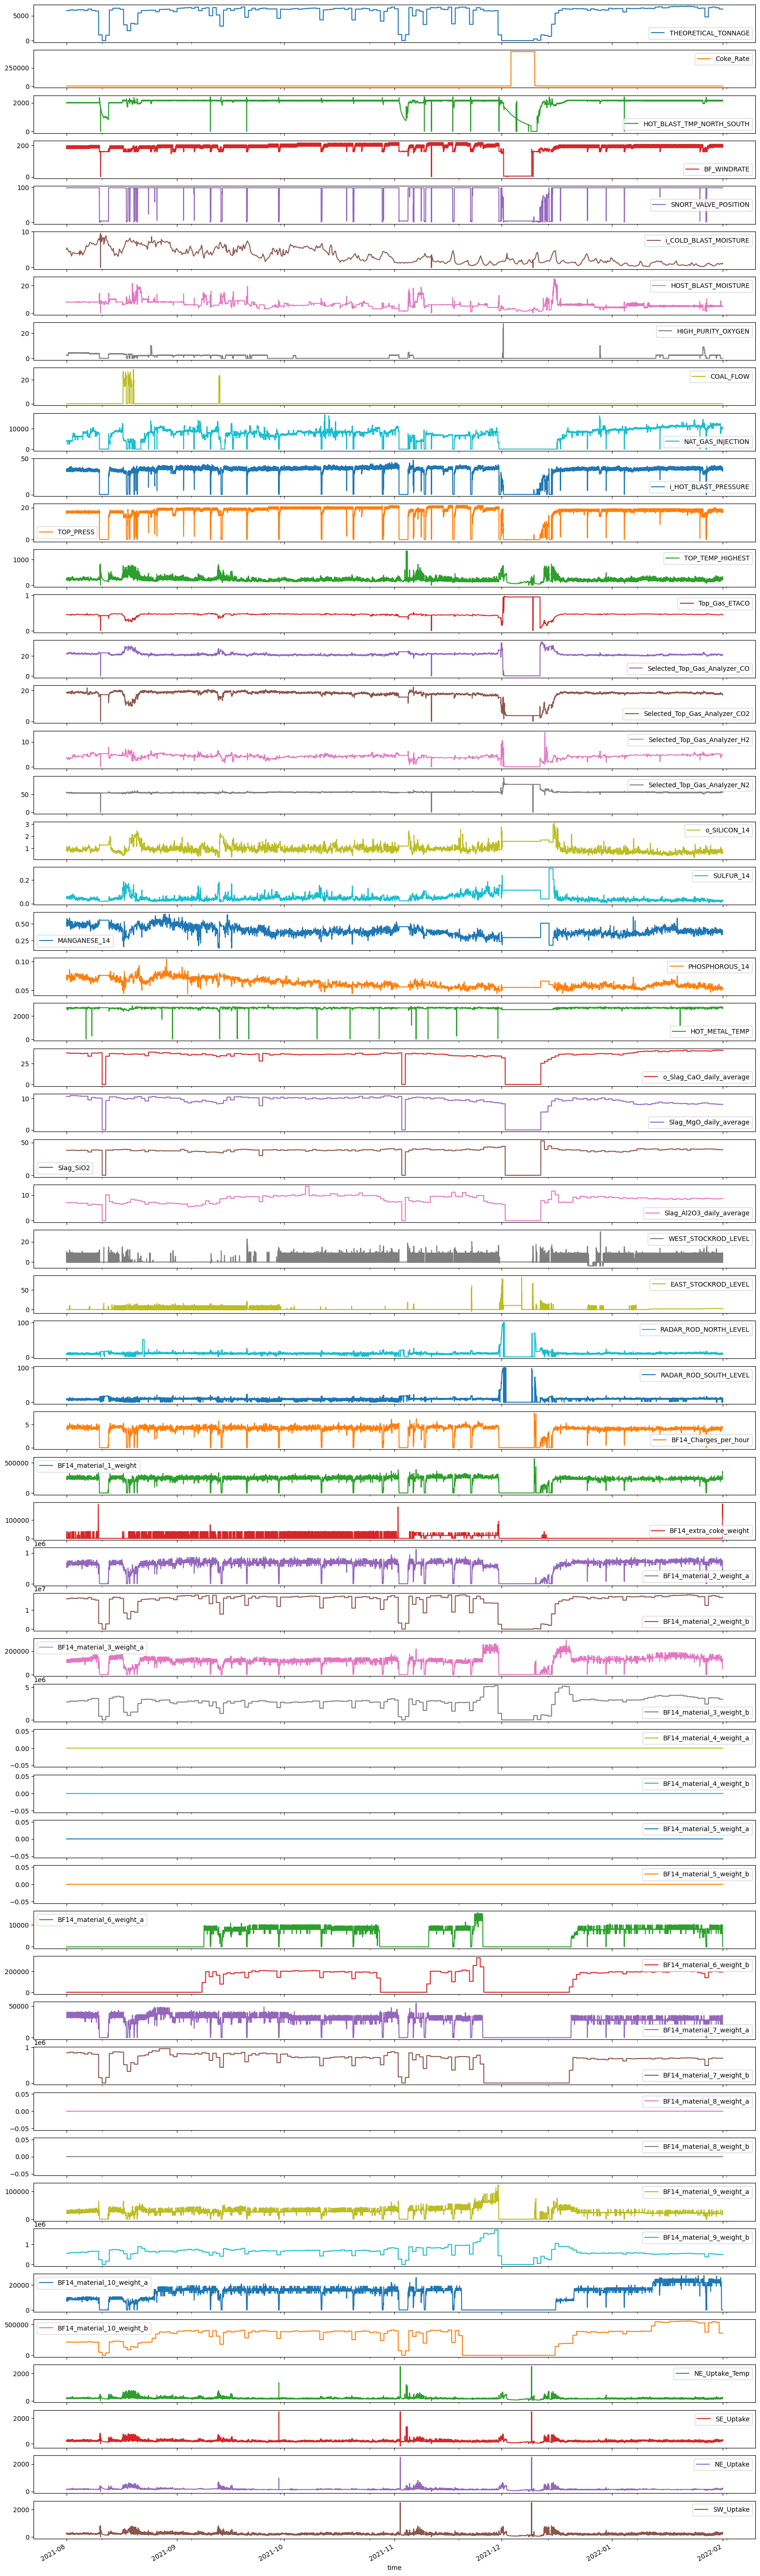

In [13]:

all_ts_data.plot( figsize=(20,80),  subplots=True   )



## Process CIVS data


In [14]:

my_cols = ['time', 'BF_WINDRATE', 'i_COLD_BLAST_MOISTURE', 'HOST_BLAST_MOISTURE', 'HIGH_PURITY_OXYGEN', 'COAL_FLOW', 
           'NAT_GAS_INJECTION', 'TOP_TEMP_HIGHEST', 'Top_Gas_ETACO' , 'o_SILICON_14']

ts_data = pd.read_csv(
                          'data/RealSeqData.CIVS.Nov.2023.csv', 
                          index_col='time', 
                          parse_dates=True,
                          usecols=my_cols
)


/var/folders/q4/zdsjyw0d297_fn6_fh5n7g9h0000gn/T/ipykernel_8040/1364238104.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ts_data = pd.read_csv(


In [15]:

ts_data.head(10)


,BF_WINDRATE,i_COLD_BLAST_MOISTURE,HOST_BLAST_MOISTURE,HIGH_PURITY_OXYGEN,COAL_FLOW,NAT_GAS_INJECTION,TOP_TEMP_HIGHEST,Top_Gas_ETACO,o_SILICON_14
time,,,,,,,,,
2021-08-01 00:00:00,179.749638,4.997585,8.084517,2.510680,0.0,4034.234339,245.335109,0.458303,0.776
2021-08-01 00:01:00,179.765945,5.000531,8.079545,2.489381,0.0,4024.947376,251.198262,0.458277,0.776
2021-08-01 00:02:00,179.782251,5.003476,8.074573,2.489037,0.0,4011.601682,242.609669,0.458250,0.776
2021-08-01 00:03:00,179.798490,5.006422,8.069602,2.496867,0.0,4012.024633,232.798103,0.458224,0.776
2021-08-01 00:04:00,179.784430,5.009368,8.064630,2.501961,0.0,4000.467204,224.011942,0.458197,0.776
2021-08-01 00:05:00,179.745323,5.012314,8.059658,2.497154,0.0,3997.553600,220.645614,0.458171,0.776
2021-08-01 00:06:00,179.706216,5.015259,8.054686,2.491771,0.0,4029.213402,218.070590,0.458145,0.776
2021-08-01 00:07:00,179.667109,5.018205,8.049715,2.494794,0.0,4041.618733,215.495565,0.458118,0.776
2021-08-01 00:08:00,179.628002,5.021151,8.044743,2.492257,0.0,4036.835631,212.920541,0.458092,0.776



## Make sure values are in order 


In [16]:

## ts_data.interpolate(inplace = True) 
## ts_data.infer_freq



ts_data.sort_index( inplace = True )




In [17]:

print( ts_data.index.freq )


None



## Set time unit to minutes


In [18]:

## ts_data.index.freq = 'S' ## 'min'


ts_data = ts_data.resample('min').first()



In [19]:

print(ts_data.index.freq)


<Minute>



## Print Info


In [20]:

ts_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 264960 entries, 2021-08-01 00:00:00 to 2022-01-31 23:59:00
Freq: T
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   BF_WINDRATE            264960 non-null  float64
 1   i_COLD_BLAST_MOISTURE  264960 non-null  float64
 2   HOST_BLAST_MOISTURE    264960 non-null  float64
 3   HIGH_PURITY_OXYGEN     264960 non-null  float64
 4   COAL_FLOW              264960 non-null  float64
 5   NAT_GAS_INJECTION      264960 non-null  float64
 6   TOP_TEMP_HIGHEST       264960 non-null  float64
 7   Top_Gas_ETACO          264960 non-null  float64
 8   o_SILICON_14           264960 non-null  float64
dtypes: float64(9)
memory usage: 20.2 MB


In [21]:

ts_data.head(10)


,BF_WINDRATE,i_COLD_BLAST_MOISTURE,HOST_BLAST_MOISTURE,HIGH_PURITY_OXYGEN,COAL_FLOW,NAT_GAS_INJECTION,TOP_TEMP_HIGHEST,Top_Gas_ETACO,o_SILICON_14
time,,,,,,,,,
2021-08-01 00:00:00,179.749638,4.997585,8.084517,2.510680,0.0,4034.234339,245.335109,0.458303,0.776
2021-08-01 00:01:00,179.765945,5.000531,8.079545,2.489381,0.0,4024.947376,251.198262,0.458277,0.776
2021-08-01 00:02:00,179.782251,5.003476,8.074573,2.489037,0.0,4011.601682,242.609669,0.458250,0.776
2021-08-01 00:03:00,179.798490,5.006422,8.069602,2.496867,0.0,4012.024633,232.798103,0.458224,0.776
2021-08-01 00:04:00,179.784430,5.009368,8.064630,2.501961,0.0,4000.467204,224.011942,0.458197,0.776
2021-08-01 00:05:00,179.745323,5.012314,8.059658,2.497154,0.0,3997.553600,220.645614,0.458171,0.776
2021-08-01 00:06:00,179.706216,5.015259,8.054686,2.491771,0.0,4029.213402,218.070590,0.458145,0.776
2021-08-01 00:07:00,179.667109,5.018205,8.049715,2.494794,0.0,4041.618733,215.495565,0.458118,0.776
2021-08-01 00:08:00,179.628002,5.021151,8.044743,2.492257,0.0,4036.835631,212.920541,0.458092,0.776


array([<Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>], dtype=object)

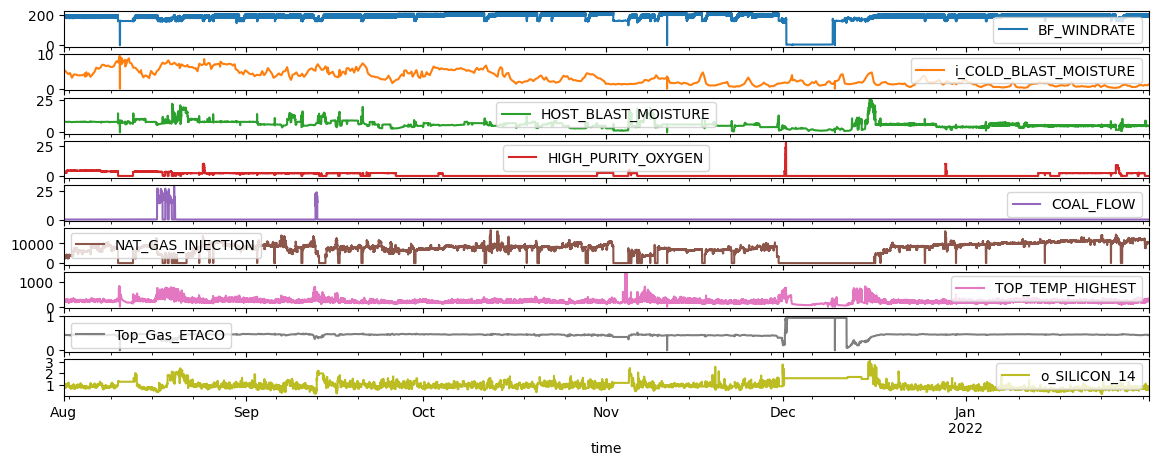

In [22]:

ts_data.plot( figsize=(14,5),  subplots=True   )


In [23]:

ts_data.shape


(264960, 9)


## PANDAS remove duplicates


In [24]:

df_example = pd.DataFrame(
    {
    'brand':  ['Yum Yum' , 'Yum Yum', 'Yum Yum', 'Yum Yum'  , 'Indomie'  , 'Indomie', 'Indomie', 'Indomie'  ]   ,
    'style':  ['cup'     , 'cup'    , 'cup'    , 'plate'    , 'cup'      , 'pack'   , 'pack'   , 'pack'     ]   ,
    'rating': [ 4        ,  4       ,  4       ,  2         , 3.5        ,  15      ,  5       ,  5         ]
     }
)



In [25]:

df_example  


,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.0
2,Yum Yum,cup,4.0
3,Yum Yum,plate,2.0
4,Indomie,cup,3.5
5,Indomie,pack,15.0
6,Indomie,pack,5.0
7,Indomie,pack,5.0


In [26]:

removed_duplicates_example_df = df_example.drop_duplicates()


In [27]:

removed_duplicates_example_df


,brand,style,rating
0,Yum Yum,cup,4.0
3,Yum Yum,plate,2.0
4,Indomie,cup,3.5
5,Indomie,pack,15.0
6,Indomie,pack,5.0


In [28]:


rating_only_removed_duplicates_example_df = df_example.drop_duplicates(  subset=['rating']  )


In [29]:

rating_only_removed_duplicates_example_df


,brand,style,rating
0,Yum Yum,cup,4.0
3,Yum Yum,plate,2.0
4,Indomie,cup,3.5
5,Indomie,pack,15.0
6,Indomie,pack,5.0



## Remove duplicates CIVS data from silicon only


In [30]:

ts_data.shape


(264960, 9)

In [31]:

silicon_only_removed_duplicates_ts_data = ts_data.drop_duplicates(  subset=['o_SILICON_14']  )


In [32]:

silicon_only_removed_duplicates_ts_data.shape


(7065, 9)

In [33]:

silicon_only_removed_duplicates_ts_data.head(10)


,BF_WINDRATE,i_COLD_BLAST_MOISTURE,HOST_BLAST_MOISTURE,HIGH_PURITY_OXYGEN,COAL_FLOW,NAT_GAS_INJECTION,TOP_TEMP_HIGHEST,Top_Gas_ETACO,o_SILICON_14
time,,,,,,,,,
2021-08-01 00:00:00,179.749638,4.997585,8.084517,2.510680,0.0,4034.234339,245.335109,0.458303,0.776000
2021-08-01 00:19:00,179.600802,5.053554,7.990054,2.456667,0.0,4028.138203,205.420057,0.457802,0.819350
2021-08-01 00:20:00,179.694806,5.056500,7.985082,2.479121,0.0,4041.112945,209.191439,0.457775,0.827000
2021-08-01 00:56:00,179.583889,5.162548,8.114960,2.505082,0.0,4012.618535,209.291187,0.456826,0.918667
2021-08-01 00:57:00,179.489192,5.165493,8.113246,2.498699,0.0,4015.129249,209.582889,0.456800,0.937000
2021-08-01 00:58:00,179.501748,5.168439,8.111532,2.490508,0.0,4016.444312,212.150233,0.456781,0.906167
2021-08-01 00:59:00,180.515755,5.171385,8.109818,2.503535,0.0,4021.858151,214.717577,0.456774,0.900000
2021-08-01 02:33:00,179.600948,5.448287,7.948701,2.537408,0.0,3923.076604,234.779756,0.456096,0.924000
2021-08-01 02:34:00,179.594158,5.451233,7.946987,2.519439,0.0,3903.495153,232.948602,0.456089,0.932000



## Show everything again after removed duplicates from silicon only


In [34]:

silicon_only_removed_duplicates_ts_data.shape


(7065, 9)

In [35]:

print( silicon_only_removed_duplicates_ts_data.index.freq )


None



## Make sure values are in order 


In [36]:

silicon_only_removed_duplicates_ts_data.shape


(7065, 9)

In [37]:

silicon_only_removed_duplicates_ts_data.sort_index( inplace = True )


In [38]:

silicon_only_removed_duplicates_ts_data.shape


(7065, 9)

In [39]:

print( silicon_only_removed_duplicates_ts_data.index.freq )


None


In [40]:

silicon_only_removed_duplicates_ts_data.shape


(7065, 9)

In [41]:

## silicon_only_removed_duplicates_ts_data.resample('37.495min').first()

silicon_only_removed_duplicates_ts_data = silicon_only_removed_duplicates_ts_data.resample('37.5min').first()


In [42]:

silicon_only_removed_duplicates_ts_data.shape


(7064, 9)

In [43]:

print(  silicon_only_removed_duplicates_ts_data.index.freq  )


<2250 * Seconds>


In [44]:


silicon_only_removed_duplicates_ts_data.shape


(7064, 9)

In [45]:

silicon_only_removed_duplicates_ts_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7064 entries, 2021-08-01 00:00:00 to 2022-01-31 22:22:30
Freq: 2250S
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   BF_WINDRATE            2339 non-null   float64
 1   i_COLD_BLAST_MOISTURE  2339 non-null   float64
 2   HOST_BLAST_MOISTURE    2339 non-null   float64
 3   HIGH_PURITY_OXYGEN     2339 non-null   float64
 4   COAL_FLOW              2339 non-null   float64
 5   NAT_GAS_INJECTION      2339 non-null   float64
 6   TOP_TEMP_HIGHEST       2339 non-null   float64
 7   Top_Gas_ETACO          2339 non-null   float64
 8   o_SILICON_14           2339 non-null   float64
dtypes: float64(9)
memory usage: 551.9 KB


<Axes: xlabel='time'>

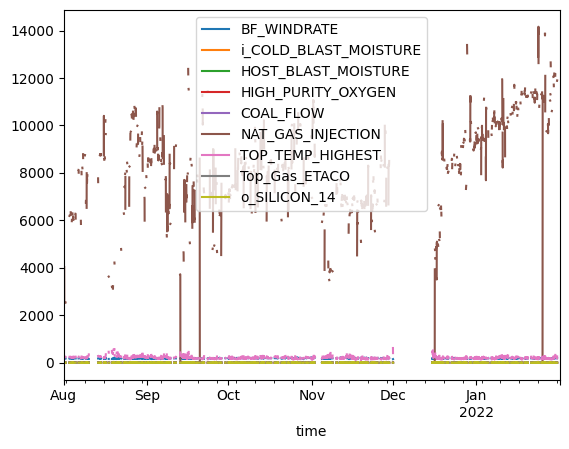

In [46]:

silicon_only_removed_duplicates_ts_data.plot()


array([<Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>], dtype=object)

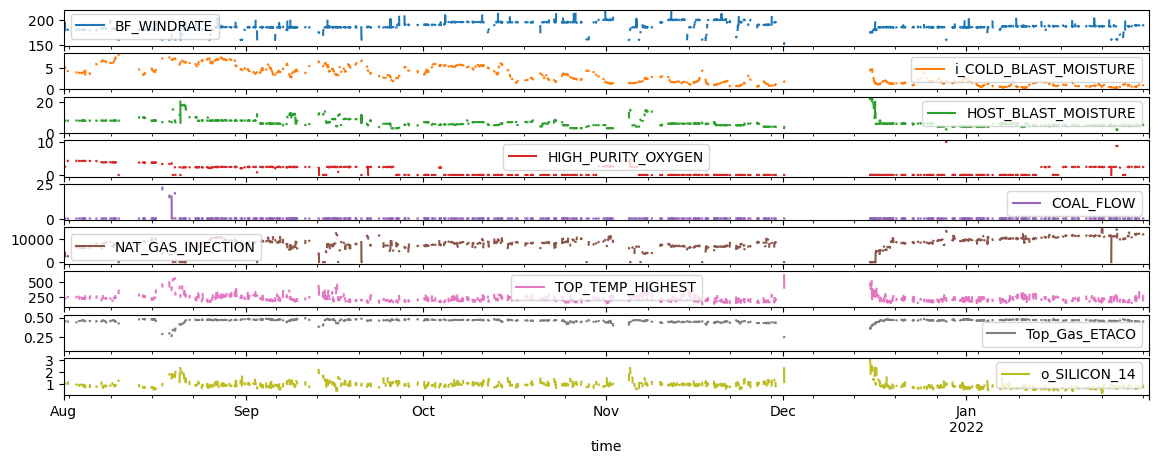

In [47]:

silicon_only_removed_duplicates_ts_data.plot( figsize=(14,5),  subplots=True   )


In [48]:

silicon_only_removed_duplicates_ts_data.shape


(7064, 9)

In [49]:

print(silicon_only_removed_duplicates_ts_data.index.freq)


<2250 * Seconds>
